In [79]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data=load_boston()

In [81]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [82]:
x=pd.DataFrame(data=data.data,columns=data.feature_names)

In [83]:
y=data.target

In [84]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

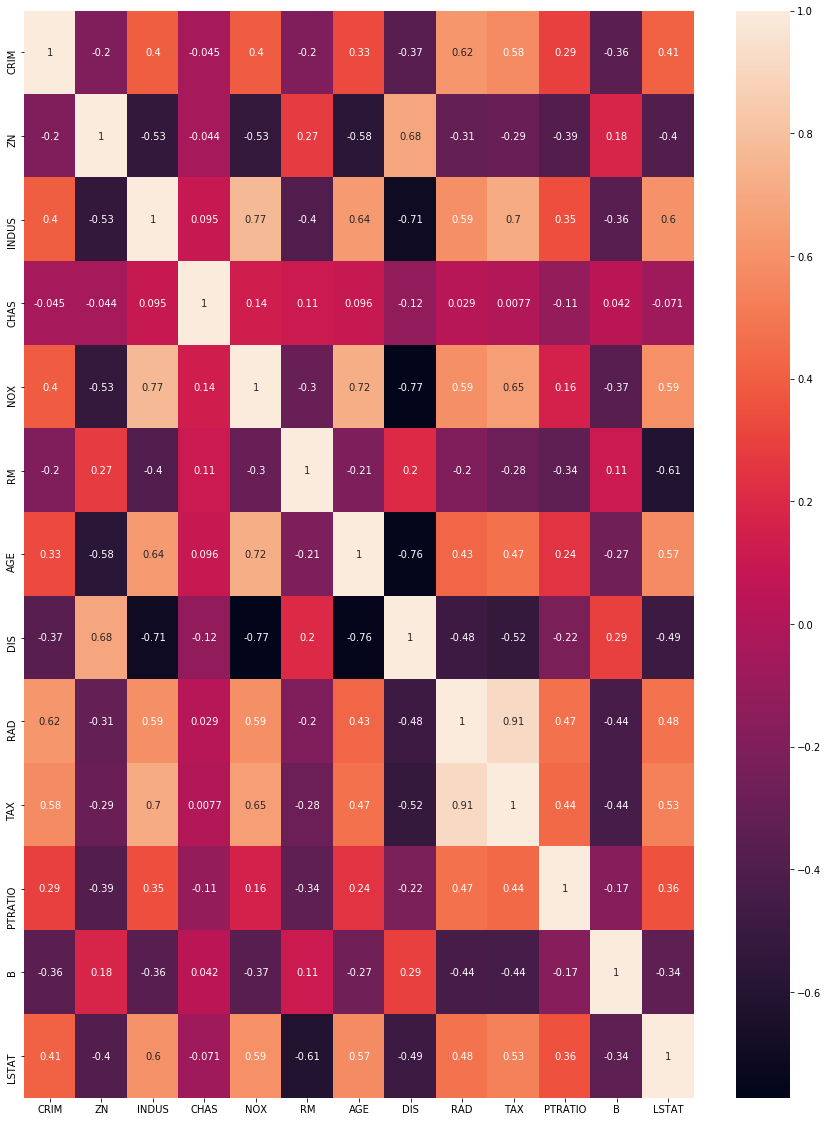

In [86]:
plt.figure(figsize=(15,20))
corr=x_train.corr()
sns.heatmap(data=corr,annot=True)

In [87]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [88]:
features=correlation(x_train,0.7)

In [89]:
features=list(features)

In [90]:
x_train=x_train.drop(features,axis=1)

In [91]:
x_test=x_test.drop(features,axis=1)

In [92]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_test=sd.transform(x_test)

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
model=LinearRegression()

In [104]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
predictions=model.predict(x_test)

In [109]:
predictions

array([27.12992684, 32.92897075, 16.96939031, 24.68971707, 19.8970414 ,
       22.73615641, 18.02967037, 13.77491463, 22.04557846, 20.18198689,
       23.38657587, 21.77679808, -6.63072099, 22.48385161, 19.39238762,
       26.12946033, 17.30480099,  4.93325119, 37.90931916, 18.69283484,
       25.16519171, 26.65676006, 12.00445118, 23.39222108, 18.19779937,
       14.37199415, 22.47331003, 15.8621854 , 21.66621624, 19.12086374,
       19.97620673, 25.44104985, 25.93882062, 18.88442367, 15.65914478,
       19.79926536, 32.25393479, 20.76667447, 23.37750552, 24.3641947 ,
       13.45526473, 27.98814117, 38.13441778, 18.51727629, 25.91164107,
       17.00112995, 14.11165539, 25.75179496, 19.96682568, 30.55936403,
       23.91582512, 33.29423545, 16.65360426, 25.80796072, 38.20142266,
       23.58377209, 19.94805187, 28.3231866 , 24.86089312, 15.55230832,
       25.57376196, 30.55491211, 29.80372938, 15.39375243, 26.6464836 ,
       15.58797837, 20.64127241, 25.03968229, 27.29142434, 12.36

In [110]:
y_train

array([12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,  8.7, 27.5, 20.7,
       36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6, 24.4,  8.8, 19.2,
       25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6, 14.5, 18.7, 17.8,
       16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4, 19.3,  8.5, 20.6,
       17. , 17.1, 14.5, 50. , 14.3, 12.6, 28.7, 21.2, 19.3, 23.1, 19.1,
       25. , 33.4,  5. , 29.6, 18.7, 21.7, 23.1, 22.8, 21. , 48.8, 14.6,
       16.6, 27.1, 20.1, 19.8, 21. , 41.3, 23.2, 20.4, 18.5, 29.4, 36.4,
       24.4, 11.8, 13.8, 12.3, 17.8, 33.1, 26.7, 13.4, 14.4, 50. , 22. ,
       19.9, 23.8, 17.5, 12.7,  5.6, 31.1, 26.2, 19.4, 16.7, 13.8, 22.9,
       15.3, 27.5, 36.1, 22.9, 24.5, 25. , 50. , 34.9, 31.7, 24.1, 22.1,
       14.1, 42.8, 19.3, 32.2, 26.4, 21.8, 21.7,  8.3, 46.7, 43.1, 31.5,
       10.5, 16.7, 20. , 33.3, 17.8, 50. , 20.5, 23.2, 13.1, 19.6, 22.8,
       28.7, 30.7, 22.9, 21.9, 23.9, 32.7, 24.3, 21.5, 24.6,  8.5, 26.4,
       23.1, 15. ,  8.8, 19.3, 23.9, 24.7, 19.8, 23

In [106]:
from sklearn.metrics import r2_score

In [111]:
r2_score(y_test,predictions)

0.5995621060641368